## 1. Text Classification
* What is Classification?
  * Given a set of classes, Assign the correct class label to the given input.
* Examples of Text Classification
  * Topic identification : Is this news article about Politics, Sports, or Technology?
  * Spam Detection : Is this email a spam or not?
  * Sentiment analysis : Is this movie review positive or negative?
  * Spelling correction : weather or whether? color or colour?
* Supervised Learning
  * Humans learn from past experiences, machines learn from past instances!
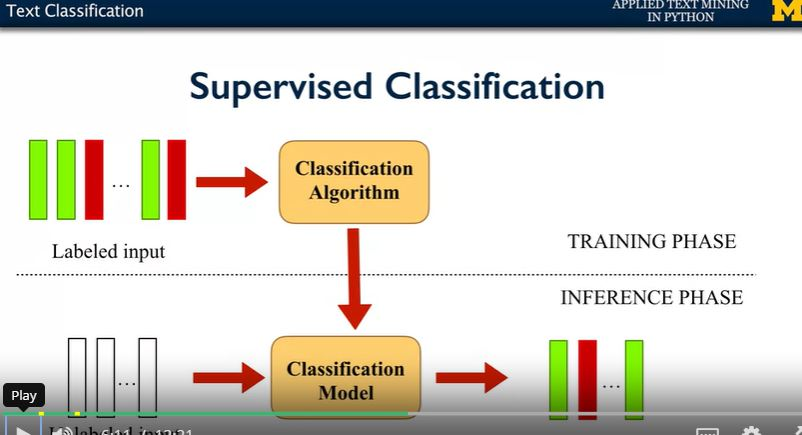

  * Learn a classification model on properties("features") and their importance ("weights") from labeled instances
    * X: Set of attributes or features {x1,x2, ..., xn}
    * y : A "class" label from the label set Y = {y1, y2, ..., yk}
    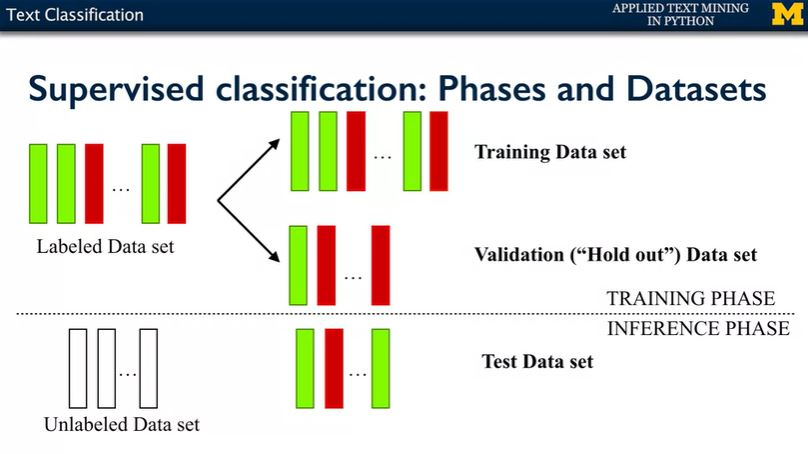

* Classfication paradigms
  * When there are only two possible classes; |Y| = 2 : **Binary Classification**
  * When there are more than two possible classes; |Y| > 2 : **Multi-class Classification**
  * When data instances can have two or more than labels : **Multi-label Classification**

* Questions to ask in Supervised Learning
  * Training phase:
    * What are the features? How do you represent them?
    * What is the classfication model/algorithm?
    * What are the model parameters?

  * Inference phase:
    * What is the expected performance? What is a good measure?
    
  

## 2. Identifying Features From Text
* Why is textual data unique?
  * Textual data presents a unique set of challenges
  * All the information you need is in the text
  * But features can be pulled out from text at different granularities!(세분성)
* Types of textual features (1)
  * Words
    * By far the most common class of features
    * Handling commonly-occurring words : Stop words
    * Normalization : Make lower case vs. leave as-is
    * Stemming(어간 추출) / Lemmatization(표제어 추출)

* Types of textual features (2)
  * Characteristics of words : Capitalization
  * Parts of speech of words in a sentence
    * ex: weather ? wheather ? -> If the word is 'the', it probably means 'the weather'.
  * Grammatical structure, sentence parsing
  * Grouping words of similar meaning, semantics
    * {buy, purchase}
    * {Mr., Ms., Dr., Prof.}; Numbers/Digits; Dates

* Types of textual features (3)
  * Depending on classification tasks, features may come from inside words and word sequences
    * bigrams, trigrams, n-grams: "White House"
    * character sub-sequences in words: "ing", "ion", ...

## 3. Naive Bayes Classsifiers
* Case study : Classifying text search queries
  * Suppose you are interested in classifying search queries in three classes : Entertainment, Computer Science, Zoology
  * Most common class of the three is Entertainment.
  * Suppose the query is "Python"
    * Python, the snake (Zoology)
    * Python, the programming language (C.S)
    * Python, as in Monty Python (Entertainment)
  * Most common class, given "Python", is Zoology.
  * Suppose the query is "Python download" -> C.S

* Probabilistic model
  * Update the likelihood of the class given new information
  * Prior Probability : Pr(y = Entertainment), Pr(y=CS), Pr(y=Zoology)
  * Posterior probability : Pr(y= Entertainment|x = "Python")

* Bayes' Rule
  * Posterior probability = (Prior probability x Likelihood) / Evidence
  * Pr(y|X) = ( Pr(y) x Pr(X|y) ) / Pr(X)
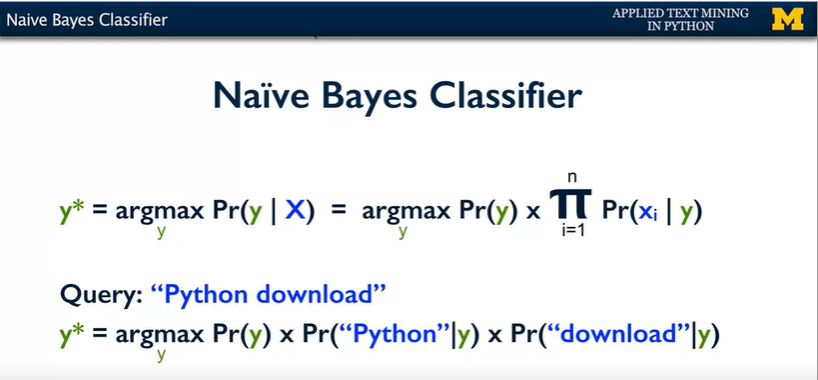
* Naive Bayes : What are the parameters?
  * Prior probabilities : Pr(y) for all y in Y
  * Likelihood : Pr(xi|y) for all features xi and labels y in Y
  * If there are 3 classes (|Y| = 3) and 100 features in X, how many parameters does naive Bayes models have?
  * |Y| + 2* |x| + |x|*|y|


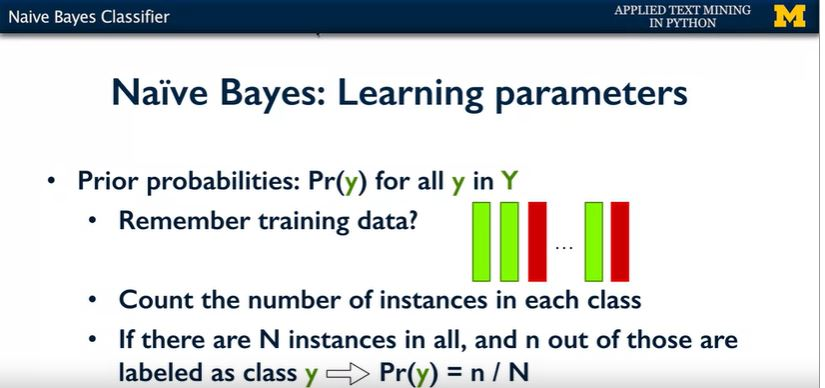
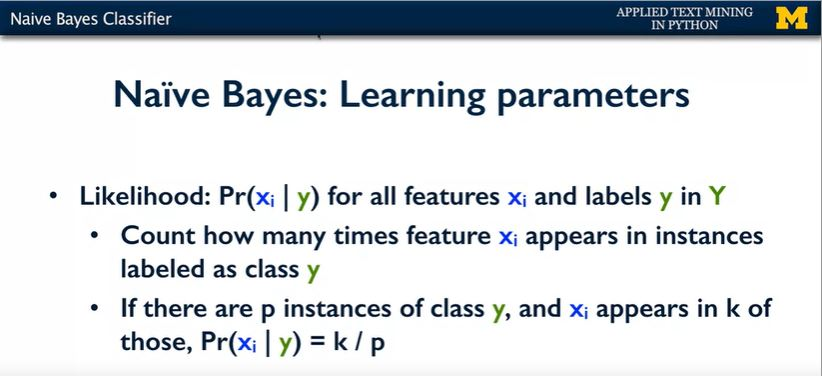

* Naive Bayes : Smoothing
  * What happens if Pr(xi|y) = 0 ?
    * ex : You never saw the word 'python' in the queries that were labeled entertainment.
    * But then, the posterior probability Pr(y|xi) will be 0.
  * Instead, smooth the parameters.
  * Laplace smoothing or Additive smoothing : Add a dummy count 
    * Pr(xiy) = (k+1) / (p+n) ; where n is number of features.
    * [나이브베이 분류기 설명](https://wikidocs.net/22892)
* Take Home Concepts
  * Naive Bayes is a probabilistic model
  * Naive, because it assumes features are independent of each otehr, given the class label.
  

## 4. Naive Bayes Variations
* Two Classic Naive Bayes Variants for Text
  * Multinomial Naive Bayes
    * Data follows a multinomial distribution(다항 분포)
    * Each feature value is a count(word occurrence counts, TF-IDF weighting,...)
  * Bernoulli Naive Bayes
    * Data follows a multivariate Bernoulli distribution
    * Each feature is binary (word is present / absent)
    
## 5. Support Vector Machines
*  Classifier = Function on input data
* Decision Boundaries
  * Data overfitting : Decision boundary learned over training data doesn't generalize to test data

* Linear Boundaries
  * Easy to find
  * Easy to evaluate -> Simple rule
  * Find the linear boudary = Find w
    * the coefficients that are the weights associated with the dimensions X1 and X2
    * many methods (Perceptron, Linear Discriminative Analysis, Linear least squares ...)
    
    

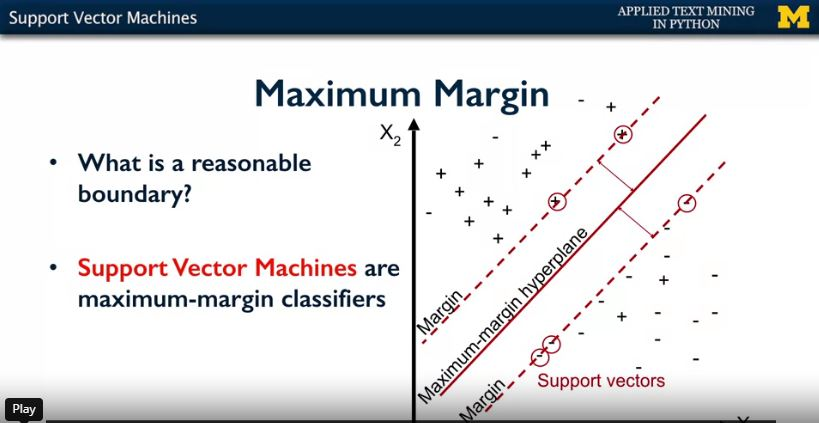

  * SVM
    * SVMs are linear classifiers that find a hyperplane to separate two classes of data : positive and negative
    * Given training data ; where xi is instance vector and yi is one of [-1, +1]
    * SVM finds a linear function w (weight vector)
      * f(xi) =< w*xi > + b
      * if f(xi) >= 0, yi = +1; else yi = -1

    * Multi-class classfication
      * One vs Rest
      * n-class SVM has n classifiers.
      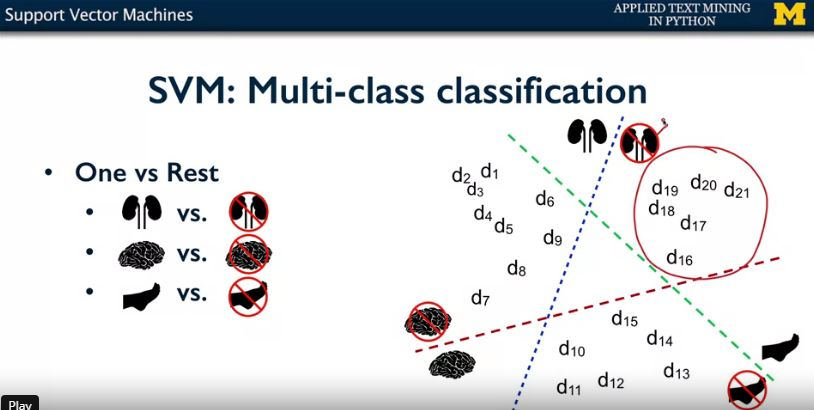
      

  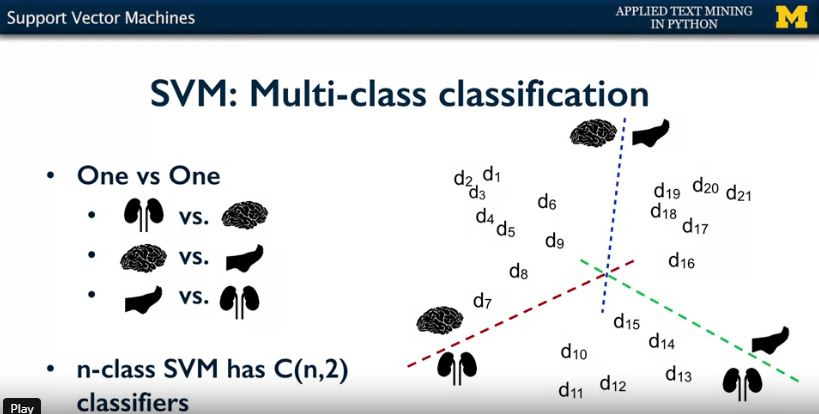

  * SVM Parameters (1) : Parameter C
    * Regularization : How much importance should you give individual data points as compared to better generalized model
    * Regularization parameter c
      * Larger values of c = less regularization
        * fit training data as well as possible, every data point important
      * Smaller values of c = more regularization
         * More tolerant to errors on individual data points

  * You could change that parameter depending on how important you want your individual data point classifications to be.
  * SVM Parameters (2) : Other params
    * Linear kernels usually work best for text data
      * Other kernels include rbf, polynomial
    * multi_class : ovr(one-vs-rest)
    * class_weight : different classes can get different weights.

* Take home messages
1. Support Vector Machines tend to be the most accurate classifiers, especially in high-dimensional data
2. Strong theoretical foundation
3. Handles only numeric features
  * Convert categorical features to numeric features
  * Normalization
4. Hyperplane hard to interpret


## 6. Learning Text Classifiers in Python
* Toolkits for Supervised Text Classification
  * Scikit-learn
    * Open-source ML library
  * NLTK 
    * Interfaces with sklearn and other ML toolkits (like Weka)


In [ ]:
from sklearn import naive_bayes
clfrNB = naive_bayes.MultinomialNB()
clfrNB.fit(train_data, train_labels)
predicted_labels = clfrNB.predict(test_data)
metrics.f1_score(test_labels, predicted_labels, average = 'micro')

In [ ]:
# Using Sklearn's SVM classfier

from sklearn import svm
clfrSVM = svm.SVC(kernel = 'linear', c = 0.1)
clfrSVM.fit(train_data, train_labels)
predicted_labels = clfrSVM.predict(test_data)

In [ ]:
# Model Selection in Scikit-learn

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_labels
                                                                    , test_size = 0.333, random_stae = 0)
predicted_labels = model_selection.cross_val_predict(clfrSVM, train_data, train_labels, cv = 5)

In [ ]:
# Using NLTK's NaiveBayesClassfier

from nltk.classify import NaiveBayesClassfier

classifier = NaiveBayesClassfier.train(train_set)
classifier.classify(unlabeled_instance)
classifier.classify_many(unlabeled_instances)

nltk.classify.util.accuracy(classifier, test_set)
classifier.labels()
classifier.show_most_informative_features()

In [ ]:
# Using NLTK's SklearnClassifier

from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

clfrNB = SklearnClassifier(MultinomialNB().train(train_set))
clfrSVM = SklearnClassifier(SVC(), kernel = 'linear').train(train_set)

---

## Case Study : Sentiment Analysis

### Data Prep

In [ ]:
path = '/content/drive/MyDrive/etc/'

In [ ]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv(path+'Amazon_Unlocked_Mobile.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
df = df.sample(frac=0.1, random_state=10)

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [ ]:
df.dropna(inplace=True)

df = df[df['Rating'] != 3]

df['Positively Rated'] = np.where(df['Rating']> 3, 1, 0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [ ]:
df['Positively Rated'].mean()

0.7471776686078667

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Reviews'],
                                                    df['Positively Rated'],
                                                    random_state = 0)

In [ ]:
print('X_train first entry : \n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry : 

 Everything about it is awesome!


X_train shape:  (23052,)


### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# It tokenizes each document by finding all sequences of characters of at least two letters or numbers
# separated by word boundaries.
vect = CountVectorizer().fit(X_train)

In [ ]:
vect.get_feature_names()[::2000]

['00',
 'arroja',
 'comapañias',
 'dvds',
 'golden',
 'lands',
 'oil',
 'razonable',
 'smallsliver',
 'tweak']

In [ ]:
len(vect.get_feature_names())

19601

In [ ]:
t = vect.get_feature_names()
type(t)

list

In [ ]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<23052x19601 sparse matrix of type '<class 'numpy.int64'>'
	with 613289 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8972615386663231


In [ ]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'terrible' 'slow' 'junk' 'sucks' 'waste' 'poor' 'disappointed'
 'broke' 'useless']

Largest Coefs: 
['excelent' 'excellent' 'excelente' 'perfectly' 'love' 'perfect' 'exactly'
 'great' 'best' 'awesome']


### Tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

5442

In [ ]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.889951006492175


In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['61' 'printer' 'approach' 'adjustment' 'consequences' 'length' 'emailing'
 'degrees' 'handsfree' 'chipset']

Largest tfidf: 
['unlocked' 'handy' 'useless' 'cheat' 'up' 'original' 'exelent' 'exelente'
 'exellent' 'satisfied']


In [ ]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'slow' 'disappointed' 'worst' 'terrible' 'never' 'return' 'doesn'
 'horrible' 'waste']

Largest Coefs: 
['great' 'love' 'excellent' 'good' 'best' 'perfect' 'price' 'awesome'
 'far' 'perfectly']


In [ ]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


### n-grams

In [ ]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

29072

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9104640361714084


In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'poor' 'slow' 'worst' 'broken' 'not good' 'terrible'
 'defective' 'horrible']

Largest Coefs: 
['excellent' 'excelente' 'perfect' 'excelent' 'great' 'love' 'awesome'
 'no problems' 'good' 'best']


In [ ]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [ ]:
1 - Two class (binary) classfication
2 - skewed
3 - One vs Rest -> 틀림 (Either a or b 도 아님)
4 - Multi-class
5 - Balanaced
6 - Either a or b 
7 - 10